In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.impute import KNNImputer
from sklearn.base import TransformerMixin

In [2]:
os.chdir("C:\\Users\\HP\\Desktop\\datas")

In [3]:
df=pd.read_csv('bank_data.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,ID12101,48.0,FEMALE,NaN,17546.0,NO,1.0,NO,NO,NO,NO,YES
1,1,2,ID12102,NaN,MALE,TOWN,30085.1,YES,3.0,YES,NO,YES,YES,NO
2,2,3,ID12103,51.0,FEMALE,NaN,16575.4,YES,0.0,YES,NaN,YES,NO,NO
3,3,4,ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO,YES,NO,NO
4,4,5,ID12105,57.0,NaN,RURAL,50576.3,YES,0.0,NO,YES,NO,NO,NO


In [5]:
df.drop(df.iloc[:,[0,1]],axis=1,inplace=True)

In [6]:
cols=['ID','age','gender','region','income','married','children','car','save_act','current_act','mortgage', 'pep']
df.columns=cols

In [7]:
df.head()

,ID,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,FEMALE,NaN,17546.0,NO,1.0,NO,NO,NO,NO,YES
1,ID12102,NaN,MALE,TOWN,30085.1,YES,3.0,YES,NO,YES,YES,NO
2,ID12103,51.0,FEMALE,NaN,16575.4,YES,0.0,YES,NaN,YES,NO,NO
3,ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO,YES,NO,NO
4,ID12105,57.0,NaN,RURAL,50576.3,YES,0.0,NO,YES,NO,NO,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           600 non-null    object 
 1   age          575 non-null    float64
 2   gender       581 non-null    object 
 3   region       586 non-null    object 
 4   income       580 non-null    float64
 5   married      583 non-null    object 
 6   children     583 non-null    float64
 7   car          591 non-null    object 
 8   save_act     591 non-null    object 
 9   current_act  591 non-null    object 
 10  mortgage     595 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(3), object(9)
memory usage: 56.4+ KB


In [9]:
nulls_before=df.isna().sum()
values=df.count()
comp_rate_before=100 - ((nulls_before*100)/values)

print(comp_rate_before)

ID             100.000000
age             95.652174
gender          96.729776
region          97.610922
income          96.551724
married         97.084048
children        97.084048
car             98.477157
save_act        98.477157
current_act     98.477157
mortgage        99.159664
pep            100.000000
dtype: float64


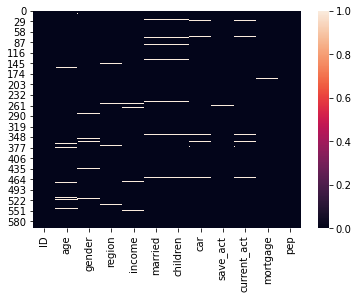

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [12]:
df = DataFrameImputer().fit_transform(df)

In [13]:
df.age = df.age.round(0)
df.children = df.children.round(0)

In [14]:
nulls_after = df.isna().sum()
comp_rate_after = 100 - ((nulls_after*100)/values)
values = {"Complete rate bef. imp.":comp_rate_before,
          "Complete rate aft. imp.":comp_rate_after}
comparison_nulls = pd.DataFrame(values)
comparison_nulls


,Complete rate bef. imp.,Complete rate aft. imp.
ID,100.000000,100.0
age,95.652174,100.0
gender,96.729776,100.0
region,97.610922,100.0
income,96.551724,100.0
married,97.084048,100.0
children,97.084048,100.0
car,98.477157,100.0
save_act,98.477157,100.0
current_act,98.477157,100.0


In [15]:
df.corr()

,age,income,children
age,1.000000,0.733050,0.031243
income,0.733050,1.000000,0.047471
children,0.031243,0.047471,1.000000


In [16]:
df.head()

,ID,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,FEMALE,INNER_CITY,17546.0,NO,1.0,NO,NO,NO,NO,YES
1,ID12102,42.0,MALE,TOWN,30085.1,YES,3.0,YES,NO,YES,YES,NO
2,ID12103,51.0,FEMALE,INNER_CITY,16575.4,YES,0.0,YES,YES,YES,NO,NO
3,ID12104,23.0,FEMALE,TOWN,20375.4,YES,3.0,NO,NO,YES,NO,NO
4,ID12105,57.0,MALE,RURAL,50576.3,YES,0.0,NO,YES,NO,NO,NO


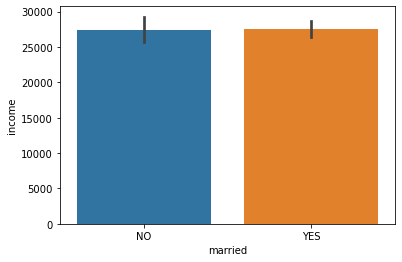

In [17]:
sns.barplot(x='married',y='income',data=df)
plt.show()

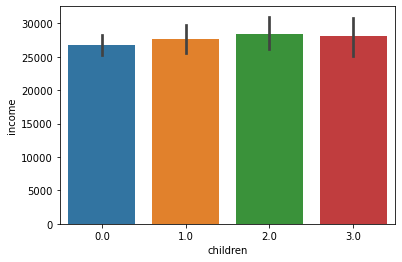

In [18]:
sns.barplot(x='children',y='income',data=df)
plt.show()

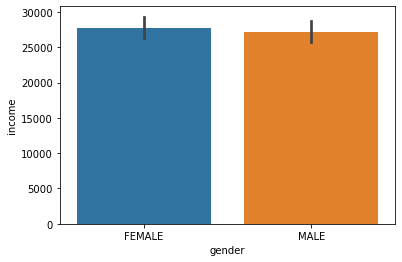

In [19]:
sns.barplot(x='gender',y='income',data=df)
plt.show()

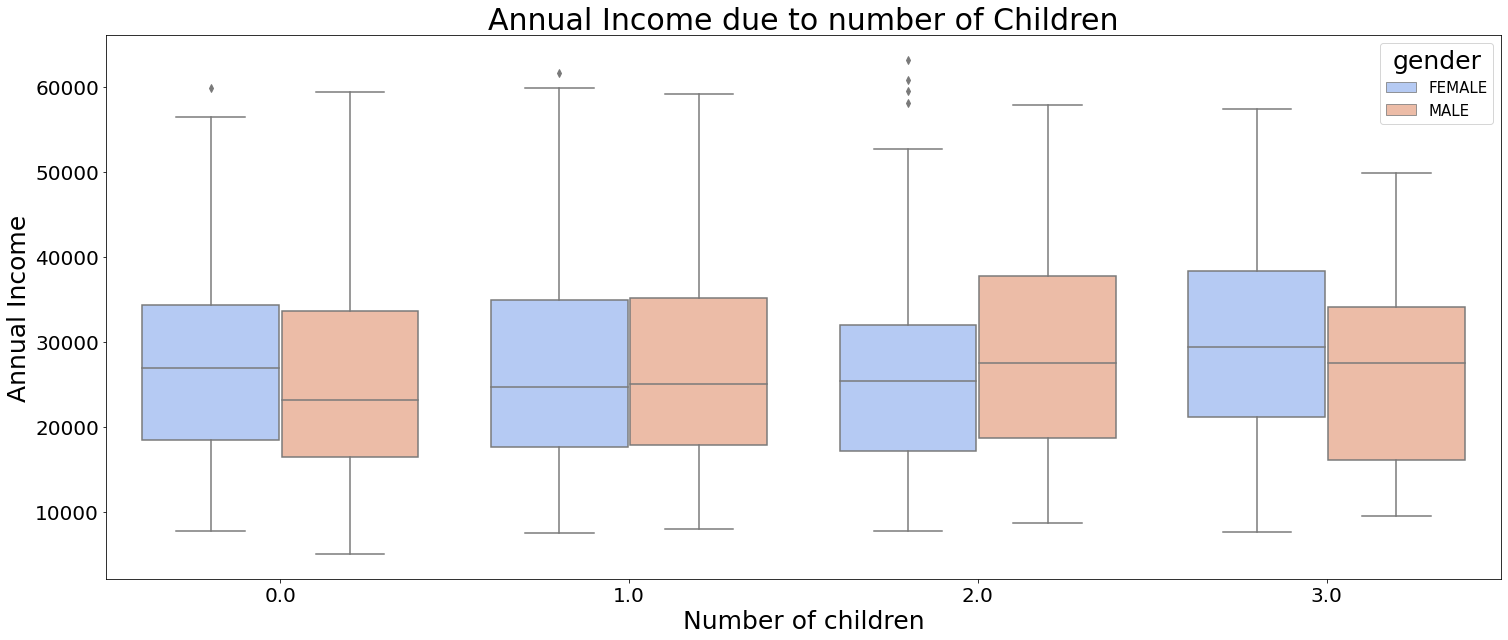

In [20]:
plt.figure(figsize=(25,10))
plt.rc('font', size = 25)
plt.rc('legend', fontsize=15)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

sns.boxplot(x="children", 
            y="income", 
            hue="gender", 
            data=df, 
            palette="coolwarm").\
            set(xlabel='Number of children', 
                ylabel='Annual Income',
                title='Annual Income due to number of Children')
plt.show()

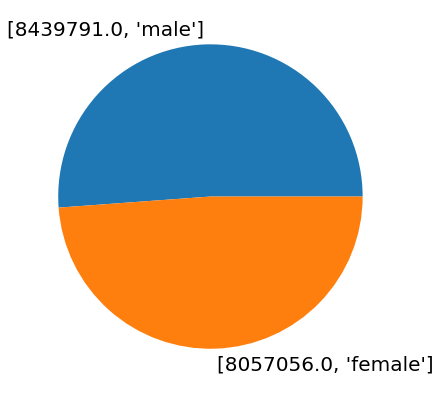

In [21]:
male_income = df[df['gender']=="MALE"]['income'].sum().round(0)
female_income = df[df['gender']=="FEMALE"]['income'].sum().round(0)

slices=[male_income,female_income]
sex=[[slices[0],'male'],[slices[1],'female']]

plt.figure(figsize=(25,7))
plt.pie(slices,labels=sex)
plt.show()

<Figure size 1800x720 with 0 Axes>

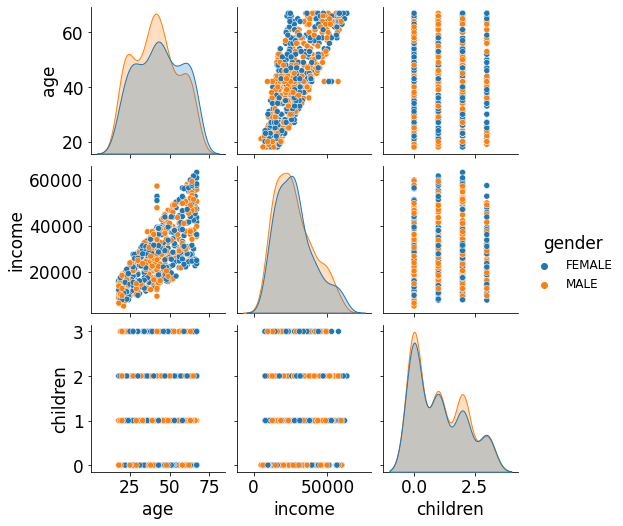

In [45]:
plt.figure(figsize=(25,10))
plt.rc('font', size = 17)
plt.rc('legend', fontsize=12)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
sns.pairplot(data = df, kind = "scatter", hue = 'gender')
plt.show()


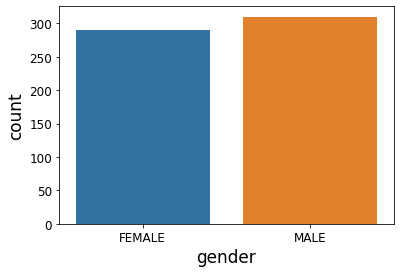

In [37]:
plt.rc('font', size = 17)
plt.rc('axes', labelsize=17)
sns.countplot(x='gender',data=df)
plt.show()